# Classification multi-classe et jeu mal balancé

Plus il y a de classes, plus la classification est difficile car le nombre d'exemples par classe diminue. Voyons cela plus en détail sur des jeux artificiels produits mar [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## découverte

Le premier jeu de données est une simple fonction linéaire sur deux variables d'ordre de grandeur différents.

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(2000, cluster_std=2, centers=5)

Text(0.5,1,'Nuage de point avec 5 classes')

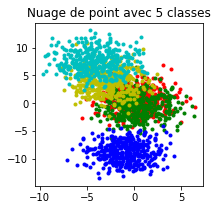

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for i, c in zip(range(0,5), "rgbyc"):
    ax.plot(X[y==i, 0], X[y==i, 1], c + '.', label=str(i))
ax.set_title("Nuage de point avec 5 classes")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.696

Mettons le jour dans une fonction pour plusieurs modèles :

In [7]:
from time import clock

def evaluate_model(models, X_train, X_test, y_train, y_test):
    res = {}
    for k, v in models.items():
        t1 = clock()
        v.fit(X_train, y_train)
        t2 = clock() - t1
        res[k + "_time_train"] = t2
        t1 = clock()
        score = v.score(X_test, y_test)
        t2 = clock() - t1
        res[k + "_time_test"] = t2
        res[k + "_score"] = score
    return res

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression()),
          'LR':  LogisticRegression()}

res = evaluate_model(models, X_train, X_test, y_train, y_test)
res

{'LR_score': 0.696,
 'LR_time_test': 0.0004017777777777787,
 'LR_time_train': 0.006699456790123459,
 'OvO-LR_score': 0.738,
 'OvO-LR_time_test': 0.0017023209876543231,
 'OvO-LR_time_train': 0.021453037037037038,
 'OvR-LR_score': 0.696,
 'OvR-LR_time_test': 0.0009106172839506155,
 'OvR-LR_time_train': 0.013372444444444447}

La stratégie *OneVsOne* a l'air d'être plus performante. La régression logistique implémente la stratégie *OneVsRest*. On ne l'évalue plus.

In [8]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': LogisticRegression()}

rows = []
for centers in range(2, 51):
    X, y = make_blobs(1000, centers=centers, cluster_std=2.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['centers'] = centers
    rows.append(res)

df = pandas.DataFrame(rows)
df

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,centers
0,1.000,0.000680,0.002402,1.000,0.000350,0.001615,2
1,0.948,0.000984,0.006711,0.928,0.000212,0.002633,3
2,0.812,0.001575,0.011289,0.808,0.000219,0.002758,4
3,0.816,0.002206,0.017778,0.804,0.000351,0.004211,5
4,0.876,0.002449,0.022703,0.884,0.000345,0.005789,6
5,0.760,0.004070,0.031454,0.764,0.000371,0.004817,7
6,0.772,0.005272,0.038620,0.724,0.000239,0.006424,8
7,0.812,0.005896,0.050565,0.796,0.000221,0.005306,9
8,0.596,0.008193,0.062744,0.548,0.000376,0.008107,10
9,0.716,0.008827,0.069474,0.660,0.000499,0.006513,11


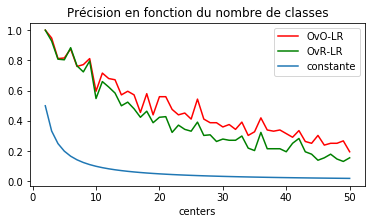

In [9]:
fix, ax = plt.subplots(1, 1, figsize=(6, 3))
for c, col in zip('rgb', [_ for _ in df.columns if '_score' in _]):
    df.plot(x="centers", y=col, label=col.replace("_score", ""), ax=ax, color=c)
x = list(range(2, 51))
ax.plot(x, [1./_ for _ in x], label="constante")
ax.legend()
ax.set_title('Précision en fonction du nombre de classes');

## évolution en fonction du nombre de classes

On pourrait se dire que c'est parce que le nombre d'exemples par classes décroît. Voyons cela.

In [10]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for centers in range(2, 51):
    X, y = make_blobs(100 * centers, centers=centers, cluster_std=2.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['centers'] = centers
    rows.append(res)

df2 = pandas.DataFrame(rows)
df2

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,centers
0,0.980000,0.001649,0.004879,0.980000,0.001214,0.004143,2
1,0.640000,0.001772,0.006688,0.653333,0.000433,0.006223,3
2,0.850000,0.000799,0.007674,0.810000,0.000611,0.005340,4
3,0.808000,0.002046,0.012918,0.800000,0.000599,0.009016,5
4,0.833333,0.002842,0.018162,0.786667,0.000404,0.010856,6
5,0.697143,0.003606,0.026857,0.634286,0.000801,0.013900,7
6,0.865000,0.002993,0.033898,0.860000,0.000478,0.015349,8
7,0.822222,0.006333,0.047031,0.737778,0.000934,0.021278,9
8,0.652000,0.007891,0.062787,0.664000,0.001016,0.024357,10
9,0.527273,0.009795,0.076743,0.494545,0.001081,0.025122,11


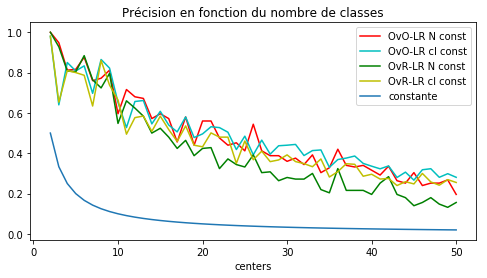

In [11]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, c2, col in zip('rg', 'cy', [_ for _ in df2.columns if '_score' in _]):
    df.plot(x="centers", y=col, label=col.replace("_score", " N const"), ax=ax, color=c1)
    df2.plot(x="centers", y=col, label=col.replace("_score", " cl const"), ax=ax, color=c2)
x = list(range(2, 51))
ax.plot(x, [1./_ for _ in x], label="constante")
ax.legend()
ax.set_title('Précision en fonction du nombre de classes');

## évolution en fonction de la variance

Un peu mieux mais cela décroît toujours. Peut-être que la courbe dépend de la confusion entre les classes ?

In [12]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for std_ in range(5, 31):
    X, y = make_blobs(1000, centers=40, cluster_std=std_/10.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['std'] = std_/10.
    rows.append(res)

df3 = pandas.DataFrame(rows)
df3

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,std
0,0.736,0.123455,1.019012,0.312,0.001651,0.081611,0.5
1,0.704,0.123093,1.010456,0.308,0.002750,0.094786,0.6
2,0.668,0.127304,0.995210,0.436,0.002774,0.092561,0.7
3,0.496,0.127492,1.053083,0.332,0.002726,0.094762,0.8
4,0.528,0.127539,1.000149,0.316,0.002760,0.093787,0.9
5,0.540,0.127342,1.000696,0.292,0.002754,0.094324,1.0
6,0.484,0.128175,1.002301,0.324,0.002742,0.095262,1.1
7,0.388,0.127785,0.995385,0.276,0.002786,0.094132,1.2
8,0.408,0.128348,1.007418,0.268,0.002743,0.090879,1.3
9,0.404,0.126982,1.030860,0.248,0.002748,0.095044,1.4


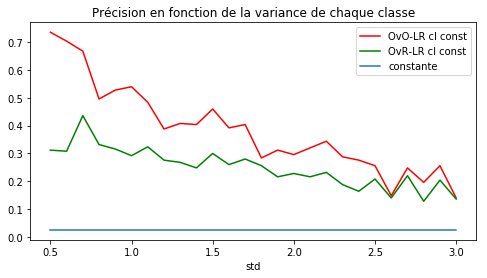

In [13]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, col in zip('rg', [_ for _ in df3.columns if '_score' in _]):
    df3.plot(x="std", y=col, label=col.replace("_score", " cl const"), ax=ax, color=c1)
x = [_/10. for _ in range(5, 31)]
ax.plot(x, [1/40. for _ in x], label="constante")
ax.set_title('Précision en fonction de la variance de chaque classe')
ax.legend();

## évolution en fonction de la dimension

Et en fonction du nombre de dimensions :

In [14]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for nf in range(2, 11):
    X, y = make_blobs(1000, centers=40, cluster_std=2., n_features=nf)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['nf'] = nf
    rows.append(res)

df4 = pandas.DataFrame(rows)
df4

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,nf
0,0.324,0.127339,0.950414,0.188,0.002739,0.090743,2
1,0.572,0.129470,0.991560,0.428,0.002837,0.103607,3
2,0.752,0.129254,1.015612,0.644,0.002831,0.112471,4
3,0.840,0.130566,1.019726,0.804,0.002849,0.126182,5
4,0.956,0.129882,1.025387,0.920,0.002844,0.141256,6
5,0.992,0.132447,1.028796,0.960,0.002857,0.154421,7
6,0.992,0.131804,1.035037,0.992,0.002858,0.166932,8
7,0.996,0.133395,1.035773,0.972,0.002889,0.183825,9
8,1.000,0.132870,1.021148,0.984,0.002916,0.192965,10


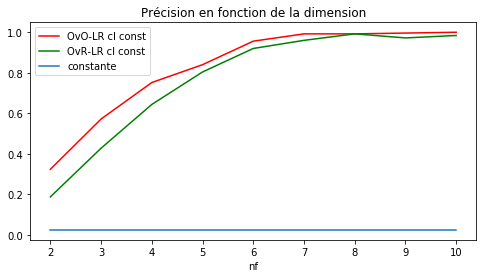

In [15]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, col in zip('rg', [_ for _ in df4.columns if '_score' in _]):
    df4.plot(x="nf", y=col, label=col.replace("_score", " cl const"), ax=ax, color=c1)
x = list(range(2, 11))
ax.plot(x, [1/40. for _ in x], label="constante")
ax.set_title('Précision en fonction de la dimension')
ax.legend();

## retour sur le nombre de classes

In [16]:
import pandas
from sklearn.ensemble import RandomForestClassifier

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for centers in range(10, 151, 25):
    X, y = make_blobs(40 * centers, centers=centers, cluster_std=2.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['centers'] = centers
    rows.append(res)

df5 = pandas.DataFrame(rows)
df5

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,centers
0,0.640000,0.004557,0.056797,0.510000,0.000944,0.012711,10
1,0.340000,0.090925,0.809441,0.277143,0.001871,0.076789,35
2,0.221667,0.372203,2.352623,0.158333,0.002882,0.314396,60
3,0.197647,1.027832,4.988898,0.114118,0.005164,0.513122,85
4,0.146364,1.631403,8.233846,0.103636,0.008533,0.677938,110
5,0.112593,2.903257,12.024460,0.072593,0.009276,1.163837,135


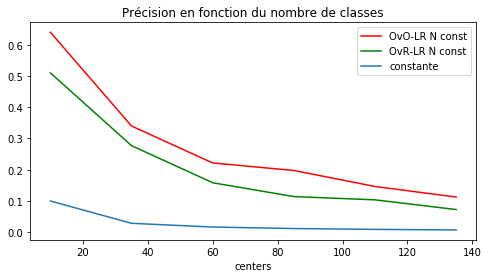

In [17]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, col in zip('rgcy', [_ for _ in df5.columns if '_score' in _]):
    df5.plot(x="centers", y=col, label=col.replace("_score", " N const"), ax=ax, color=c1)
x = df5.centers
ax.plot(x, [1./_ for _ in x], label="constante")
ax.legend()
ax.set_title('Précision en fonction du nombre de classes');